<div align="center">

# Advertising Data Analysis Using <span style="color:#1f77b4;">Theory of Constraints</span>

</div>


**Environment Setup & Data Loading**

In [45]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings("ignore")      
plt.style.use("default")               
sns.set_context("notebook")            
DATA_PATH = "advertising.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at path: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df.head()

,Date,TV,Radio,Newspaper,Sales
0,"Thursday, January 1, 2015",230.1,37.8,69.2,22.1
1,"Thursday, January 8, 2015",44.5,39.3,45.1,10.4
2,"Thursday, January 15, 2015",17.2,45.9,69.3,9.3
3,"Thursday, January 22, 2015",151.5,41.3,58.5,18.5
4,"Thursday, January 29, 2015",180.8,10.8,58.4,12.9


In [8]:
# Convert column index to list for readability
list(df.columns)

['Date', 'TV', 'Radio', 'Newspaper', 'Sales']

In [9]:
# Overview of dataset structure and data types
df.info()

# Statistical summary of numerical features
df.describe()

# Check for missing or null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       346 non-null    object 
 1   TV         346 non-null    float64
 2   Radio      346 non-null    float64
 3   Newspaper  346 non-null    float64
 4   Sales      346 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


Date         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Formatting Issue**

> We can see that the date type is an object not an actual date format
>
> Lets correct this first

In [10]:
# Convert it to a proper datetime format for time-based analysis

df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       346 non-null    datetime64[ns]
 1   TV         346 non-null    float64       
 2   Radio      346 non-null    float64       
 3   Newspaper  346 non-null    float64       
 4   Sales      346 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 13.6 KB


In [11]:
# Preview the converted datetime values

df['Date'].head()

0   2015-01-01
1   2015-01-08
2   2015-01-15
3   2015-01-22
4   2015-01-29
Name: Date, dtype: datetime64[ns]

In [12]:
df['Date'].isnull().sum() # <---- Currently we are chcking the date format also if null is there or not.

0

# Identify the Constraint (CORE TOC STEP)

In [13]:
# Compute correlation of advertising channels with Sales
# This helps identify the directional strength of each channel's impact

sales_corr = (
    df[['TV', 'Radio', 'Newspaper', 'Sales']]
    .corr()['Sales']
    .sort_values(ascending=False)
    * 100
)

sales_corr

Sales        100.000000
Radio         38.410415
TV            33.025625
Newspaper      8.529707
Name: Sales, dtype: float64

**Visual Validation of Directional Signal Using Regression Lines**

- Now, lets check this out if we put some values/invest on any of this medium or channel
- which one is giving us most of the returns or generating the sales

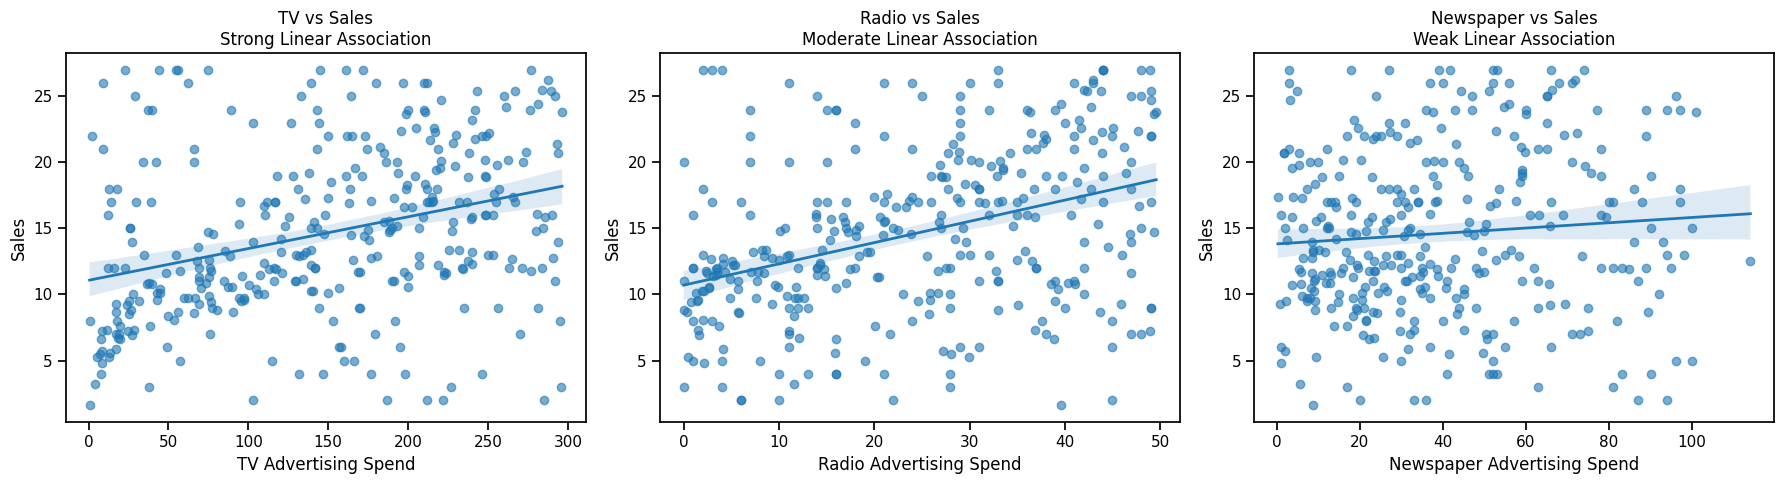

In [14]:
# Advertising Spend vs Sales
# Regression Visualization


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TV vs Sales
sns.regplot(
    x='TV',
    y='Sales',
    data=df,
    ax=axes[0],
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2}
)
axes[0].set_title('TV vs Sales\nStrong Linear Association')
axes[0].set_xlabel('TV Advertising Spend')
axes[0].set_ylabel('Sales')

# Radio vs Sales
sns.regplot(
    x='Radio',
    y='Sales',
    data=df,
    ax=axes[1],
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2}
)
axes[1].set_title('Radio vs Sales\nModerate Linear Association')
axes[1].set_xlabel('Radio Advertising Spend')
axes[1].set_ylabel('Sales')

# Newspaper vs Sales
sns.regplot(
    x='Newspaper',
    y='Sales',
    data=df,
    ax=axes[2],
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2}
)
axes[2].set_title('Newspaper vs Sales\nWeak Linear Association')
axes[2].set_xlabel('Newspaper Advertising Spend')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

> Takeaway
- As we can see, for TV & Radio there is a upward line which means if we are spending money on both they are giving us incerase in sales compare to Newspaper
>
- While in the Newspaper the line is flat which means we are not able to generate much sales in the Newspaper.

- So our constraint is "Newspaper"

In [15]:
# Multivariate Regression Analysis

# While correlation analysis and scatter plots provide directional insight,
# they do not quantify marginal throughput or isolate the individual impact
# of each advertising channel.
#
# A multivariate OLS regression is therefore performed to estimate the
# marginal contribution of each channel to Sales while controlling for
# the others.
#
# From a Theory of Constraints (TOC) perspective, this step is critical to
# distinguish true throughput drivers from channels that consume budget
# without meaningfully increasing output.

import statsmodels.api as sm

# Define predictors and target
X = df[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)  # Add intercept term
y = df['Sales']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     39.97
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           3.64e-22
Time:                        01:41:02   Log-Likelihood:                -1072.2
No. Observations:                 346   AIC:                             2152.
Df Residuals:                     342   BIC:                             2168.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0526      0.823      8.566      0.000       5.433       8.672
TV             0.0244      0.003      7.194      0.000       0.018       0.031
Radio          0.1621      0.020      8.104      0.000       0.123       0.201
Newspaper      0.0009      0.011      0.081      0.935      -0.021       0.023
==============================================================================
Omnibus:                        9.896   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               15.851
Skew:                           0.160   Prob(JB):                     0.000361
Kurtosis:                       3.998   Cond. No.                         497.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What can we understand from this?
---

> 1. this is basically a Ordinary Least Squares multiple linear regression
> 2. in Maths: Sales=β0+β1(TV)+β2(Radio)+β3(Newspaper)+ϵ

In [16]:
# Throughput Efficiency (Sales per Spend)

(df[['TV','Radio','Newspaper']]
 .div(df['Sales'], axis=0)
 .mean()
 .sort_values())

Radio         1.989754
Newspaper     3.647249
TV           12.372442
dtype: float64

In [40]:
# We have found the Constraint

## EXPLOIT THE CONSTRAINT

In [18]:
df['Newspaper_bin'] = pd.qcut(df['Newspaper'], q=4)
df.groupby('Newspaper_bin')['Sales'].mean()

Newspaper_bin
(0.299, 18.3]     14.013636
(18.3, 34.45]     13.672941
(34.45, 57.45]    15.034884
(57.45, 114.0]    15.736782
Name: Sales, dtype: float64

In [19]:
df['Newspaper'].quantile([0.25, 0.50, 0.75])

0.25    18.30
0.50    34.45
0.75    57.45
Name: Newspaper, dtype: float64

In [39]:
df_exploit = df[df['Newspaper'] <= 35]

In [21]:
df[['Sales']].mean(), df_exploit[['Sales']].mean()

(Sales    14.617052
 dtype: float64,
 Sales    13.820904
 dtype: float64)

In [22]:
df['Newspaper'].mean() - df_exploit['Newspaper'].mean()

21.315646125208186

In [23]:
df['Newspaper'].quantile([0.25, 0.50, 0.75])

0.25    18.30
0.50    34.45
0.75    57.45
Name: Newspaper, dtype: float64

In [24]:
df_exploit = df[df['Newspaper'] <= 35]

In [25]:
df['Sales'].mean(), df_exploit['Sales'].mean()

(14.617052023121387, 13.820903954802262)

In [26]:
df['Newspaper'].mean() - df_exploit['Newspaper'].mean()

21.315646125208186

In [38]:
df['TP_ratio'] = df['Sales'] / df[['TV','Radio','Newspaper']].sum(axis=1)
df_exploit['TP_ratio'] = df_exploit['Sales'] / df_exploit[['TV','Radio','Newspaper']].sum(axis=1)
df['TP_ratio'].mean(), df_exploit['TP_ratio'].mean()

(0.08248236802063037, 0.09054665560726316)

In [28]:
df_toc = df[df['Newspaper'] <= 35]

In [29]:
df_toc[['TV','Radio','Sales']].corr()['Sales'].sort_values(ascending=False)

Sales    1.000000
Radio    0.526301
TV       0.433305
Name: Sales, dtype: float64

In [30]:
X = df_toc[['TV','Radio']]
X = sm.add_constant(X)
y = df_toc['Sales']
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     79.41
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           3.12e-25
Time:                        01:41:02   Log-Likelihood:                -492.39
No. Observations:                 177   AIC:                             990.8
Df Residuals:                     174   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5141      0.735      7.499      0.000       4.063       6.965
TV             0.0287      0.004      8.163      0.000       0.022       0.036
Radio          0.2053      0.021      9.815      0.000       0.164       0.247
==============================================================================
Omnibus:                       18.380   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.450
Skew:                           0.230   Prob(JB):                     4.53e-14
Kurtosis:                       5.850   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
df_toc['TV_Radio'] = df_toc['TV'] * df_toc['Radio']
X = df_toc[['TV','Radio','TV_Radio']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     55.73
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           2.94e-25
Time:                        01:41:02   Log-Likelihood:                -489.94
No. Observations:                 177   AIC:                             987.9
Df Residuals:                     173   BIC:                             1001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0080      0.995      7.047      0.000       5.045       8.971
TV             0.0183      0.006      3.136      0.002       0.007       0.030
Radio          0.1318      0.039      3.356      0.001       0.054       0.209
TV_Radio       0.0005      0.000      2.202      0.029    5.35e-05       0.001
==============================================================================
Omnibus:                       28.856   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.929
Skew:                           0.587   Prob(JB):                     1.80e-20
Kurtosis:                       6.310   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_sim = df_exploit.copy()
df_sim['TV'] += 0.7 * 21.3
df_sim['Radio'] += 0.3 * 21.3

df_sim['Sales_pred'] = (
    7.008 +
    0.0183 * df_sim['TV'] +
    0.1318 * df_sim['Radio'] +
    0.0005 * df_sim['TV'] * df_sim['Radio']
)
df_sim['Sales_pred'].mean()

15.552941232485875

In [33]:
model.conf_int().loc['Newspaper']

0   -0.021150
1    0.022974
Name: Newspaper, dtype: float64

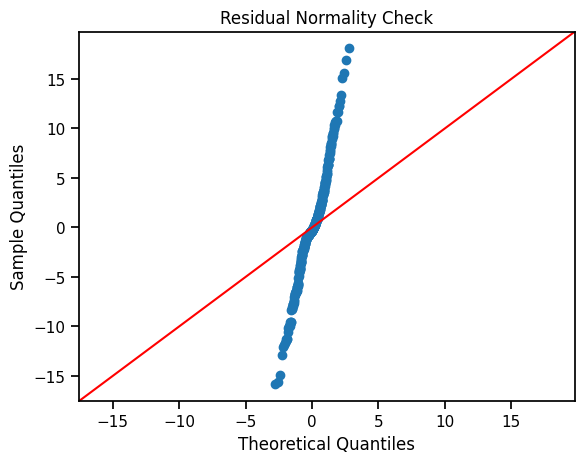

In [34]:
sm.qqplot(model.resid, line='45')
plt.title("Residual Normality Check")
plt.show()

In [41]:
(df_sim['Sales_pred'].mean() - df_exploit['Sales'].mean()) / 21.3

0.08131630411660155

**CONCLUSION**
> The analysis identifies Newspaper advertising as a low-impact constraint, while TV and Radio act as true sales drivers.
> Reallocating budget from Newspaper to TV and Radio improves sales throughput without increasing total spend,
> supporting data-driven decision-making using the Theory of Constraints.